In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import os
import cv2

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [4]:
liste_fichiers = os.listdir("train")

In [5]:
len(liste_fichiers)

25000

In [6]:
liste_fichiers[12499],liste_fichiers[12500]

('cat.9999.jpg', 'dog.0.jpg')

In [7]:
liste_fichiers_train = liste_fichiers[:2500] + liste_fichiers[22500:]

In [8]:
liste_fichiers_test = liste_fichiers[2500:3000] + liste_fichiers[22000:22500]

In [9]:
len(liste_fichiers_train)

5000

In [10]:
len(liste_fichiers_test)

1000

In [11]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_ GRAYSCALE or COLOR
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

In [12]:
ROWS = 128
COLS = 128
CHANNELS = 3

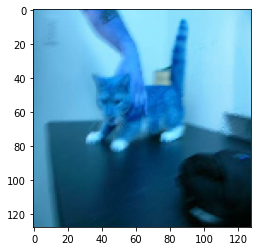

In [13]:
plt.imshow(read_image(f"train/{liste_fichiers[0]}"))

In [14]:
liste_img = [read_image(f"train/{fichier}") for fichier in liste_fichiers_train]

In [15]:
X_train = np.array(liste_img)

In [16]:
X_train = X_train/255

In [17]:
X_test = np.array([read_image(f"train/{fichier}") for fichier in liste_fichiers_test])

In [18]:
X_test = X_test/255

In [19]:
y_train = np.array([0 for i in range(2500)]+[1 for i in range(2500)])

In [20]:
y_test = np.array([0 for i in range(500)]+[1 for i in range(500)])

In [21]:
y_train[2499], y_train[2500]

(0, 1)

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='acc')

In [30]:
model.fit(X_train, y_train, epochs = 25)

Epoch 1/25
157/157 [==============================] - 93s 594ms/step - loss: 0.1841 - acc: 0.9240
Epoch 2/25
157/157 [==============================] - 93s 592ms/step - loss: 0.1447 - acc: 0.9438
Epoch 3/25
157/157 [==============================] - 93s 594ms/step - loss: 0.0866 - acc: 0.9692
Epoch 4/25
157/157 [==============================] - 97s 615ms/step - loss: 0.0927 - acc: 0.9632
Epoch 5/25
157/157 [==============================] - 96s 608ms/step - loss: 0.0829 - acc: 0.9690
Epoch 6/25
157/157 [==============================] - 87s 553ms/step - loss: 0.0698 - acc: 0.9738
Epoch 7/25
157/157 [==============================] - 96s 609ms/step - loss: 0.0455 - acc: 0.9824
Epoch 8/25
157/157 [==============================] - 96s 613ms/step - loss: 0.0666 - acc: 0.9762
Epoch 9/25
157/157 [==============================] - 87s 557ms/step - loss: 0.0299 - acc: 0.9890
Epoch 10/25
157/157 [==============================] - 98s 625ms/step - loss: 0.0393 - acc: 0.9854
Epoch 11/25
157/157

In [33]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 4s 137ms/step - loss: 1.4310 - acc: 0.8110


[1.4309978485107422, 0.8109999895095825]

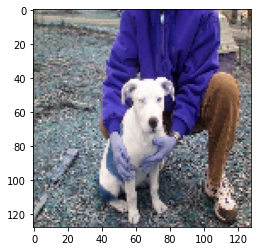

Our model says it is a : dog


In [34]:
idx2 = random.randint(0, len(y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 128, 128, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'cat'
else:
    pred = 'dog'
    
print("Our model says it is a :", pred)